<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_9_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [3]:
df=pd.read_csv('/content/wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Exploratory Data Analysis (EDA)**

In [5]:
df.shape

(178, 14)

In [7]:
df.dtypes

,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64


In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


**Histograms**

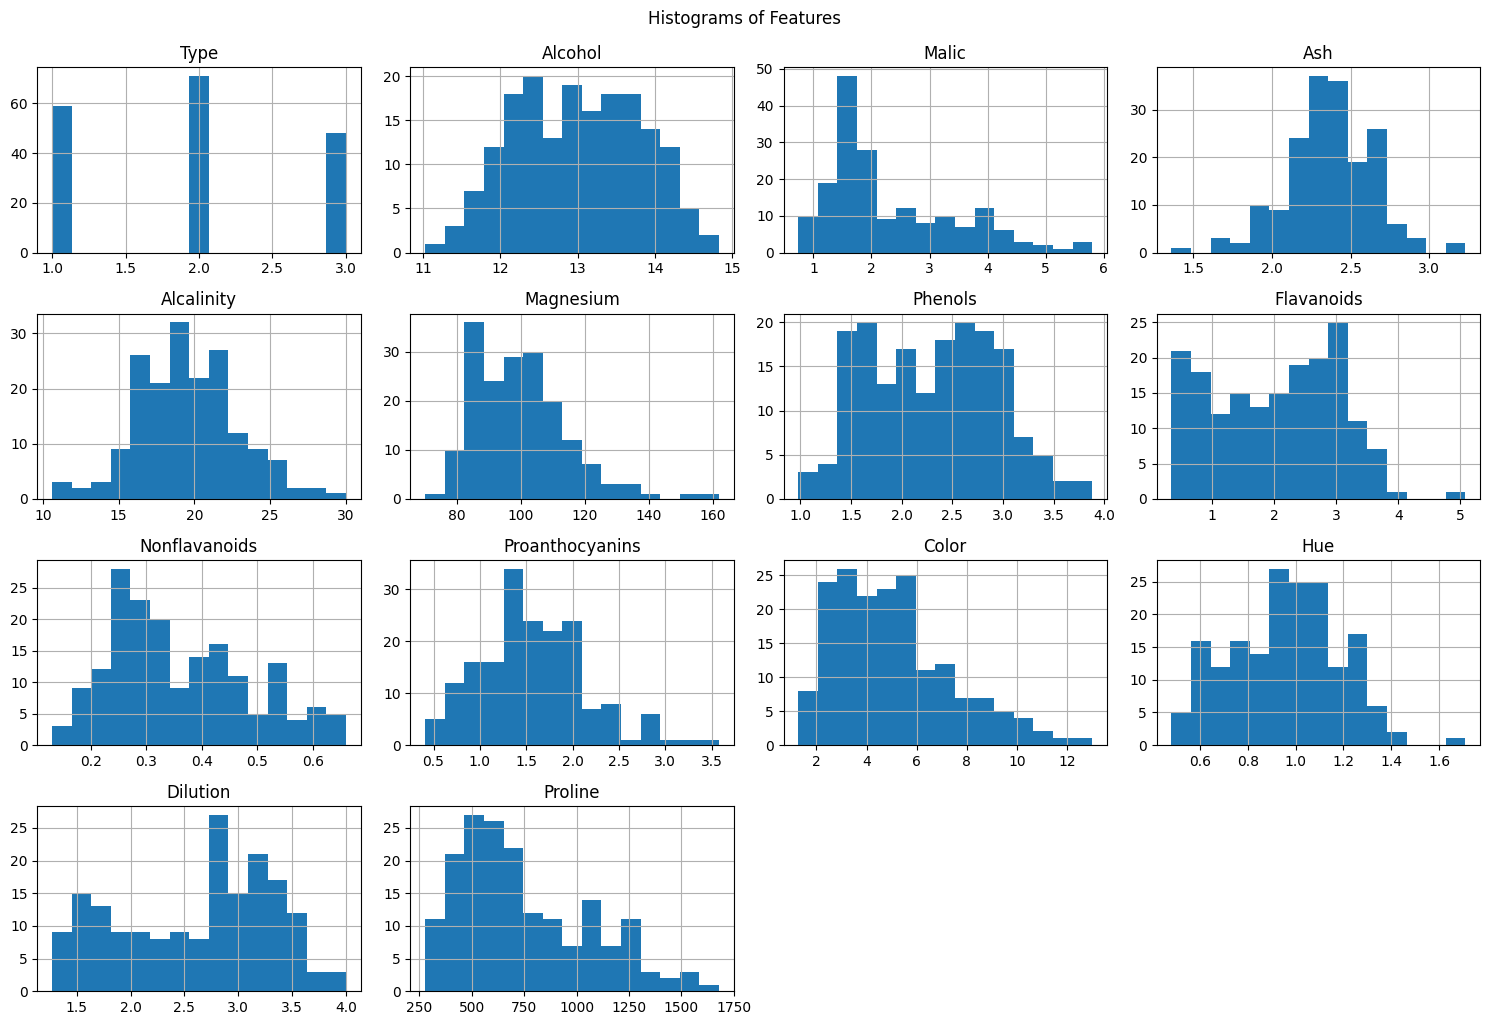

In [10]:
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

**Boxplot**

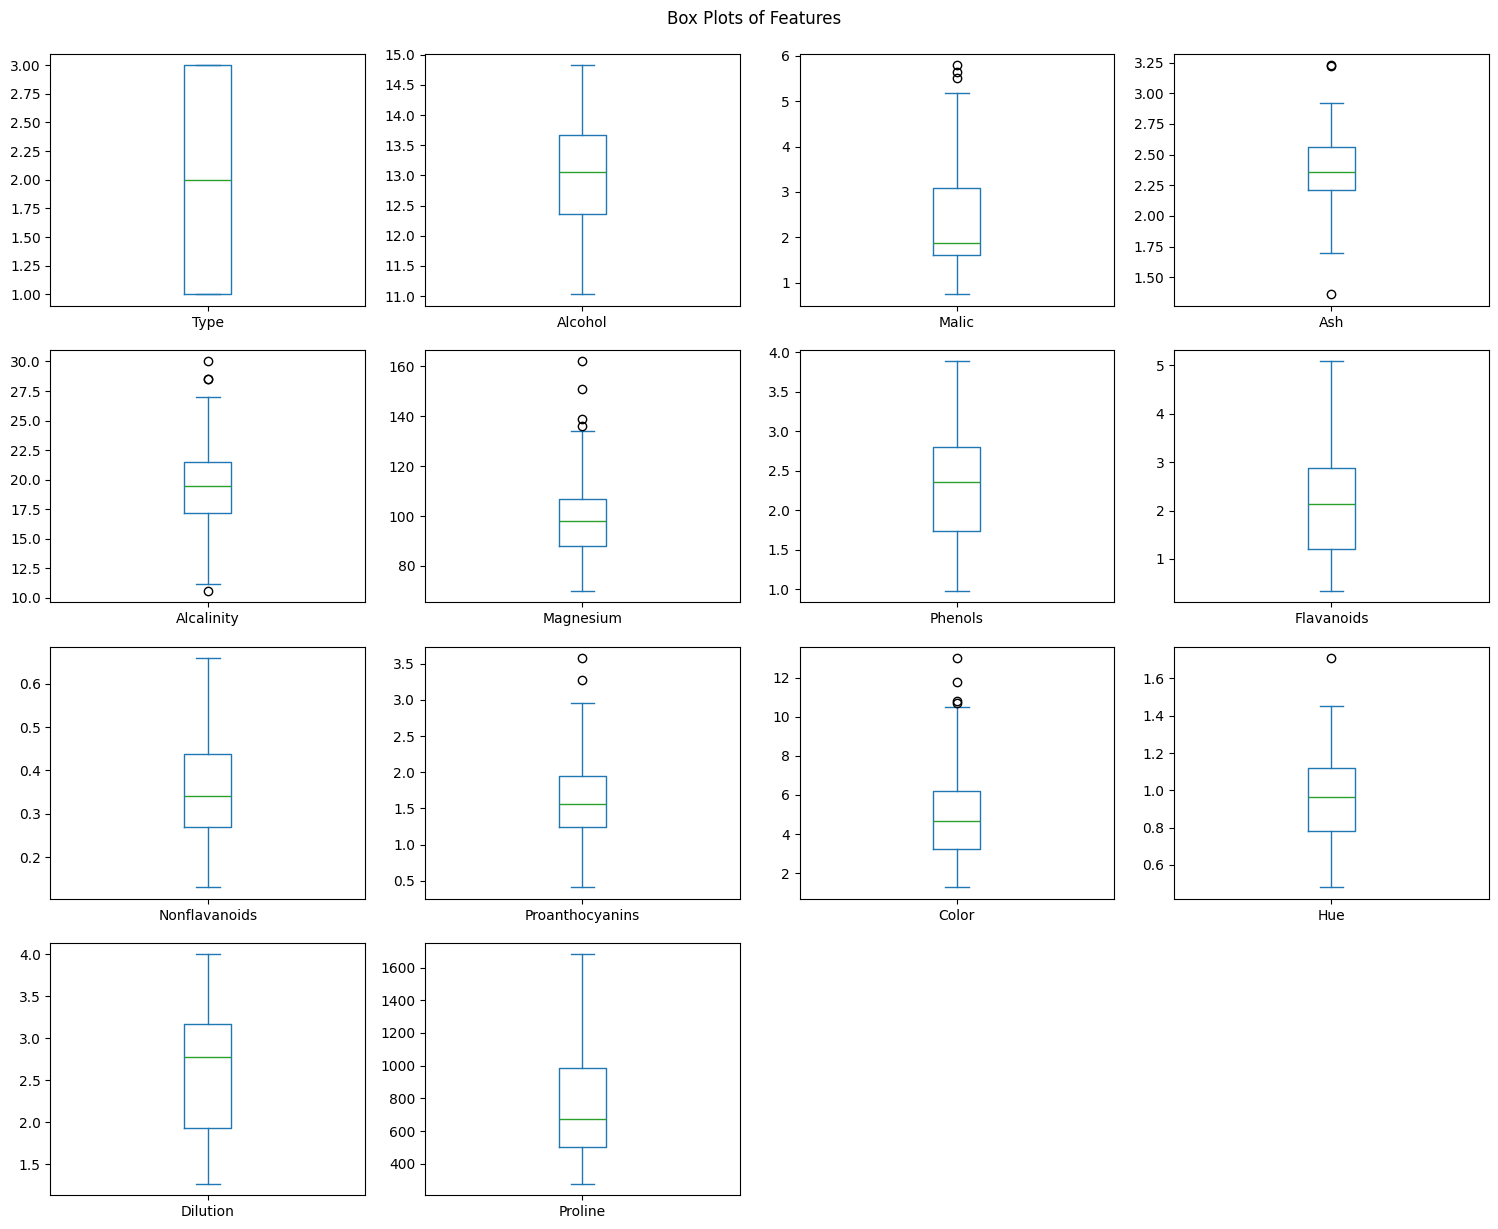

In [11]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.suptitle('Box Plots of Features', y=1.02)
plt.show()

**Correlation heatmap**

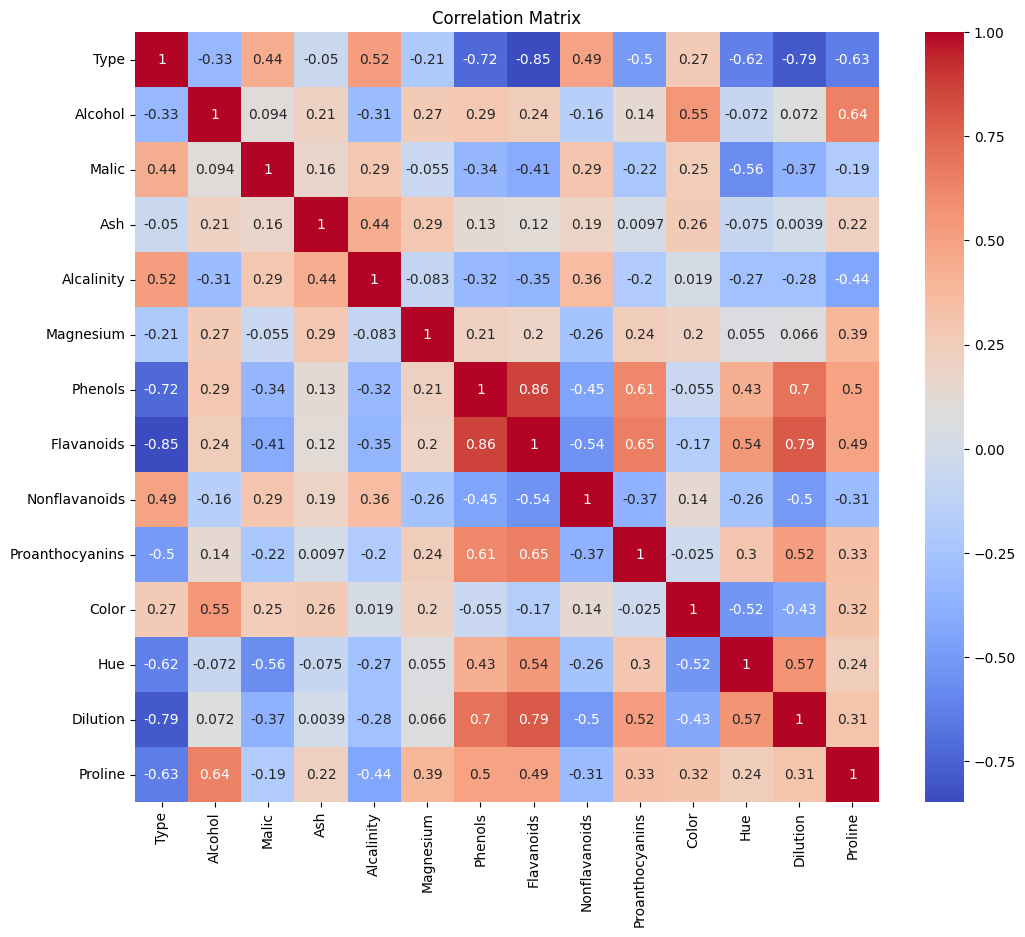

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Dimensionality Reduction with PCA**

In [16]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled




array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

**Apply PCA**

In [19]:

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

**Scree plot (explained variance)**

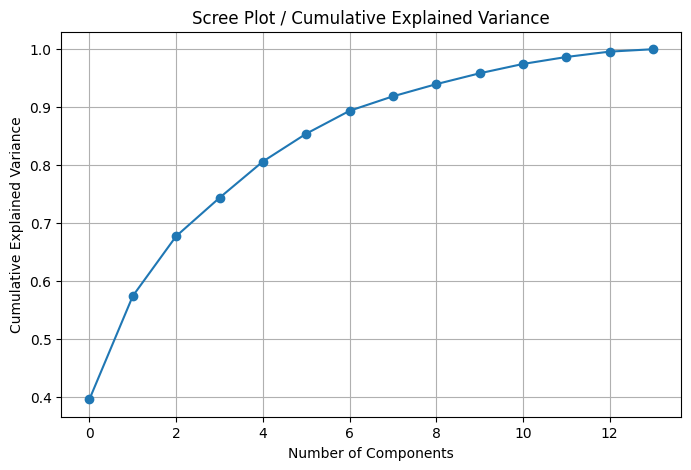

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.grid()
plt.show()

**Choose optimal number of components (e.g., 95% variance)**

In [21]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"\nNumber of components explaining 95% variance: {n_components}")


Number of components explaining 95% variance: 10


In [23]:
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)
X_pca_final

array([[-3.5229339 ,  1.45309844, -0.16479549, ..., -0.05563728,
        -0.45876506, -1.06556955],
       [-2.52885806, -0.33001925, -2.02670665, ..., -1.01037189,
         0.21880609,  0.02018203],
       [-2.78502898,  1.03693595,  0.9832377 , ...,  0.26895705,
         1.22276949,  0.10624913],
       ...,
       [ 3.02727243,  2.75604024, -0.94080304, ..., -0.05254455,
        -0.02788135,  0.21274935],
       [ 2.75522166,  2.29378408, -0.55047368, ..., -0.42651198,
         0.04878416, -0.47979317],
       [ 3.49633565,  2.76060799,  1.01315115, ...,  0.32500213,
        -0.7199834 , -0.07990775]])

**Clustering with Original Data**

In [24]:
# Elbow method for original data
inertia = []
sil_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))


**Plot elbow curve**

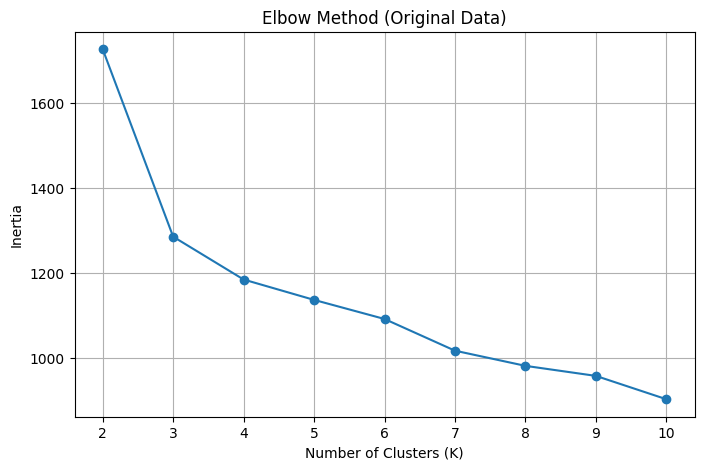

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Original Data)')
plt.grid()
plt.show()

In [27]:
# Apply KMeans with optimal K (K=3)
k_opt = 3
kmeans_orig = KMeans(n_clusters=k_opt, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)
labels_orig


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

**Original Data Clustering**

In [29]:

print("Silhouette Score:", silhouette_score(X_scaled, labels_orig))
print("Davies–Bouldin Index:", davies_bouldin_score(X_scaled, labels_orig))

Silhouette Score: 0.30648398324833453
Davies–Bouldin Index: 1.315707552261773


**Clustering with PCA Data**

In [30]:
# Elbow method on PCA data
inertia_pca = []
sil_scores_pca = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_final)
    inertia_pca.append(kmeans.inertia_)
    sil_scores_pca.append(silhouette_score(X_pca_final, kmeans.labels_))

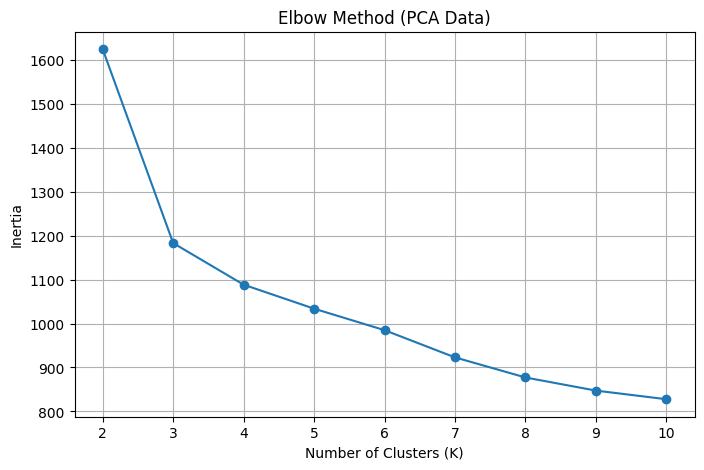

In [31]:
# Elbow curve for PCA data
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_pca, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (PCA Data)')
plt.grid()
plt.show()

In [32]:
# Apply KMeans on PCA data
kmeans_pca = KMeans(n_clusters=k_opt, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_final)

**PCA Data Clustering**

In [33]:
print("Silhouette Score:", silhouette_score(X_pca_final, labels_pca))
print("Davies–Bouldin Index:", davies_bouldin_score(X_pca_final, labels_pca))

Silhouette Score: 0.32292055407233017
Davies–Bouldin Index: 1.2578453408449173


**Comparison Plots**

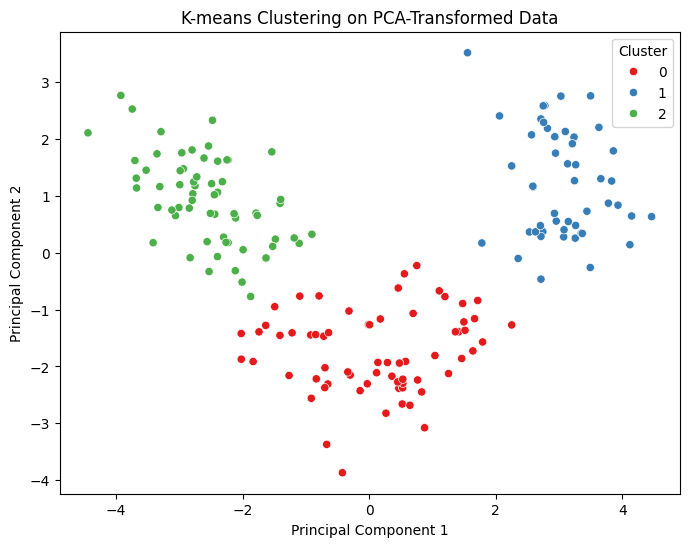

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_final[:, 0], y=X_pca_final[:, 1], hue=labels_pca, palette='Set1')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

PCA effectively reduced the dataset's dimensionality while preserving most of the variance, leading to simpler and faster clustering.

Clustering on PCA-transformed data showed comparable or improved performance over the original data, with clearer separation and better visualization.

This highlights PCA’s value in enhancing clustering results, especially for high-dimensional datasets.